In [23]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sts
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics
import numpy as np


players_15 = pd.read_csv('players_15.csv')
#players_16 = pd.read_csv('players_16.csv')
#players_16 = pd.read_csv('players_16.csv')
#players_17 = pd.read_csv('players_17.csv')
#players_18 = pd.read_csv('players_18.csv')
#players_19 = pd.read_csv('players_19.csv')
#players_20 = pd.read_csv('players_20.csv')

# 1. Обработка данных

## Удаление столбцов данных, не применимых к модели

In [2]:
pl_15_columns = ['sofifa_id','player_url','short_name','long_name','age','dob','height_cm','weight_kg','nationality','club','overall','potential','player_positions','preferred_foot','international_reputation','weak_foot','skill_moves','work_rate']
pl_15 =  players_15[pl_15_columns]
pl_15.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,CF,Left,5,3,4,Medium/Low
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,92,"LW, LM",Right,5,4,5,High/Low
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,"RM, LM, RW",Left,5,2,4,High/Low
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,90,ST,Right,5,4,4,Medium/Low
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,90,GK,Right,5,4,1,Medium/Medium


## Удаление дубликатов

In [3]:
pl_15.drop_duplicates().shape

(15465, 18)

## Проверка наличия и обработка пропусков

In [4]:
pl_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15465 entries, 0 to 15464
Data columns (total 18 columns):
sofifa_id                   15465 non-null int64
player_url                  15465 non-null object
short_name                  15465 non-null object
long_name                   15465 non-null object
age                         15465 non-null int64
dob                         15465 non-null object
height_cm                   15465 non-null int64
weight_kg                   15465 non-null int64
nationality                 15465 non-null object
club                        15465 non-null object
overall                     15465 non-null int64
potential                   15465 non-null int64
player_positions            15465 non-null object
preferred_foot              15465 non-null object
international_reputation    15465 non-null int64
weak_foot                   15465 non-null int64
skill_moves                 15465 non-null int64
work_rate                   15465 non-null object


In [5]:
pl_15.describe(include='all')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate
count,15465.000000,15465,15465,15465,15465.000000,15465,15465.000000,15465.000000,15465,15465,15465.000000,15465.000000,15465,15465,15465.000000,15465.000000,15465.000000,15465
unique,NaN,15465,14555,15409,NaN,5809,NaN,NaN,148,596,NaN,NaN,875,2,NaN,NaN,NaN,9
top,NaN,https://sofifa.com/player/214776/oscar-benitez...,J. Silva,Scott Brown,NaN,1988-01-01,NaN,NaN,England,Athletic Club de Bilbao,NaN,NaN,CB,Right,NaN,NaN,NaN,Medium/Medium
freq,NaN,1,7,3,NaN,16,NaN,NaN,1579,33,NaN,NaN,1783,11928,NaN,NaN,NaN,9145
mean,189298.588425,NaN,NaN,NaN,24.763272,NaN,181.093631,75.482703,NaN,NaN,63.948594,68.483091,NaN,NaN,1.126350,2.932363,2.267055,NaN
std,39648.820272,NaN,NaN,NaN,4.624565,NaN,6.635182,6.907243,NaN,NaN,7.208610,6.611708,NaN,NaN,0.401362,0.652270,0.719035,NaN
min,2.000000,NaN,NaN,NaN,16.000000,NaN,155.000000,50.000000,NaN,NaN,40.000000,40.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,178043.000000,NaN,NaN,NaN,21.000000,NaN,176.000000,70.000000,NaN,NaN,59.000000,64.000000,NaN,NaN,1.000000,3.000000,2.000000,NaN
50%,200844.000000,NaN,NaN,NaN,24.000000,NaN,181.000000,75.000000,NaN,NaN,64.000000,68.000000,NaN,NaN,1.000000,3.000000,2.000000,NaN
75%,214326.000000,NaN,NaN,NaN,28.000000,NaN,186.000000,80.000000,NaN,NaN,69.000000,73.000000,NaN,NaN,1.000000,3.000000,3.000000,NaN


In [6]:
pl_15.isnull().sum()

sofifa_id                   0
player_url                  0
short_name                  0
long_name                   0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
dtype: int64

In [73]:
#pl_15.age.unique - 27 значений 0, ??? + все значения до 18 лет
#pl_15.height_cm.unique - 169 значений 0, проверить значения до 155 см
#pl_15.weight_kg.unique - 67 значений 0, проверить значения до 30 кг
#pl_15.overall.unique - 93 значений 0
#pl_15.potential.unique - 95 значений 0
#pl_15.international_reputation.unique - 5 значений 0
#pl_15.weak_foot.unique - 3 значения 0
#pl_15.skill_moves.unique - 4 значения 0
#pl_15.preferred_foot.unique -                     привести к числовым значениям
#pl_15.work_rate.unique# - 4 значения 0,           привести к числовым значениям

## Обработка нулевых значений: 
если удалить данные значения - не потеряется большой объем информации, тогда как замена на какие-то значения может исказить картину

In [ ]:
pl_15['age'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['age'], inplace=True)

pl_15['height_cm'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['height_cm'], inplace=True)

pl_15['weight_kg'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['weight_kg'], inplace=True)

pl_15['overall'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['overall'], inplace=True)

pl_15['potential'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['potential'], inplace=True)

pl_15['international_reputation'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['international_reputation'], inplace=True)

pl_15['weak_foot'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['weak_foot'], inplace=True)

pl_15['skill_moves'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['skill_moves'], inplace=True)

pl_15['preferred_foot'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['preferred_foot'], inplace=True)

pl_15['work_rate'].replace('', np.nan, inplace=True)
pl_15.dropna(subset=['work_rate'], inplace=True)

pl_15.isnull().sum()

## Переведем текстовые данные в числовые значения

In [7]:
pl_15.work_rate.unique()

array(['Medium/Low', 'High/Low', 'Medium/Medium', 'High/Medium',
       'High/High', 'Medium/High', 'Low/Medium', 'Low/High', 'Low/Low'],
      dtype=object)

In [24]:
work_rate_numb = pl_15['work_rate']
def rate_numb (x):
        if x =='Low/Low':
            return 1
        elif x == 'Low/Medium':
            return 2
        elif x == 'Medium/Low':
            return 2
        elif x == 'High/Low':
            return 3
        elif x == 'Low/High':
            return 3
        elif x == 'Medium/Medium':
            return 4      
        elif x == 'High/Medium':
            return 5
        elif x == 'Medium/High':
            return 5
        elif x == 'High/High':
            return 6
        return 0
pl_15['work_rate_numb'] = pl_15['work_rate'].apply(rate_numb)

#pl_15.head()

In [25]:
pl_15.preferred_foot.unique()

array(['Left', 'Right'], dtype=object)

In [26]:
preferred_foot_numb = pl_15['preferred_foot']
def preferred_f_numb (x):
        if x =='Left':
            return 1
        elif x == 'Right':
            return 2
        return 0
pl_15['preferred_foot_numb'] = pl_15['preferred_foot'].apply(preferred_f_numb)

pl_15.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,work_rate_numb,preferred_foot_numb,weak_foot_numb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,95,CF,Left,5,3,4,Medium/Low,2,1,0
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,92,"LW, LM",Right,5,4,5,High/Low,3,2,0
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,90,"RM, LM, RW",Left,5,2,4,High/Low,3,1,0
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,90,ST,Right,5,4,4,Medium/Low,2,2,0
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,90,GK,Right,5,4,1,Medium/Medium,4,2,0


# 

In [27]:
weak_foot_numb = pl_15['weak_foot']
def weak_f_numb (x):
        if x =='Left':
            return 1
        elif x == 'Right':
            return 2
        return 0
pl_15['weak_foot_numb'] = pl_15['weak_foot'].apply(weak_f_numb)

pl_15.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,work_rate_numb,preferred_foot_numb,weak_foot_numb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,95,CF,Left,5,3,4,Medium/Low,2,1,0
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,92,"LW, LM",Right,5,4,5,High/Low,3,2,0
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,90,"RM, LM, RW",Left,5,2,4,High/Low,3,1,0
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,90,ST,Right,5,4,4,Medium/Low,2,2,0
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,90,GK,Right,5,4,1,Medium/Medium,4,2,0


In [42]:
#pl_15.player_positions.unique()

In [ ]:
#pl_15.player_positions.unique()

## Повторный пересмотр набора данных и удаление лишних столбцов

In [28]:
pl_15.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'work_rate_numb',
       'preferred_foot_numb', 'weak_foot_numb'],
      dtype='object')

In [29]:
pl_15_columns_2 = ['age','height_cm', 'weight_kg', 'overall', 'potential','international_reputation','skill_moves', 'work_rate_numb','preferred_foot_numb', 'weak_foot_numb']
pl_15_2 =  pl_15[pl_15_columns_2]
pl_15_2.head()

,age,height_cm,weight_kg,overall,potential,international_reputation,skill_moves,work_rate_numb,preferred_foot_numb,weak_foot_numb
0,27,169,67,93,95,5,4,2,1,0
1,29,185,80,92,92,5,5,3,2,0
2,30,180,80,90,90,5,4,3,1,0
3,32,195,95,90,90,5,4,2,2,0
4,28,193,92,90,90,5,1,4,2,0


# 2. Проверка взаимосвязи между признаками

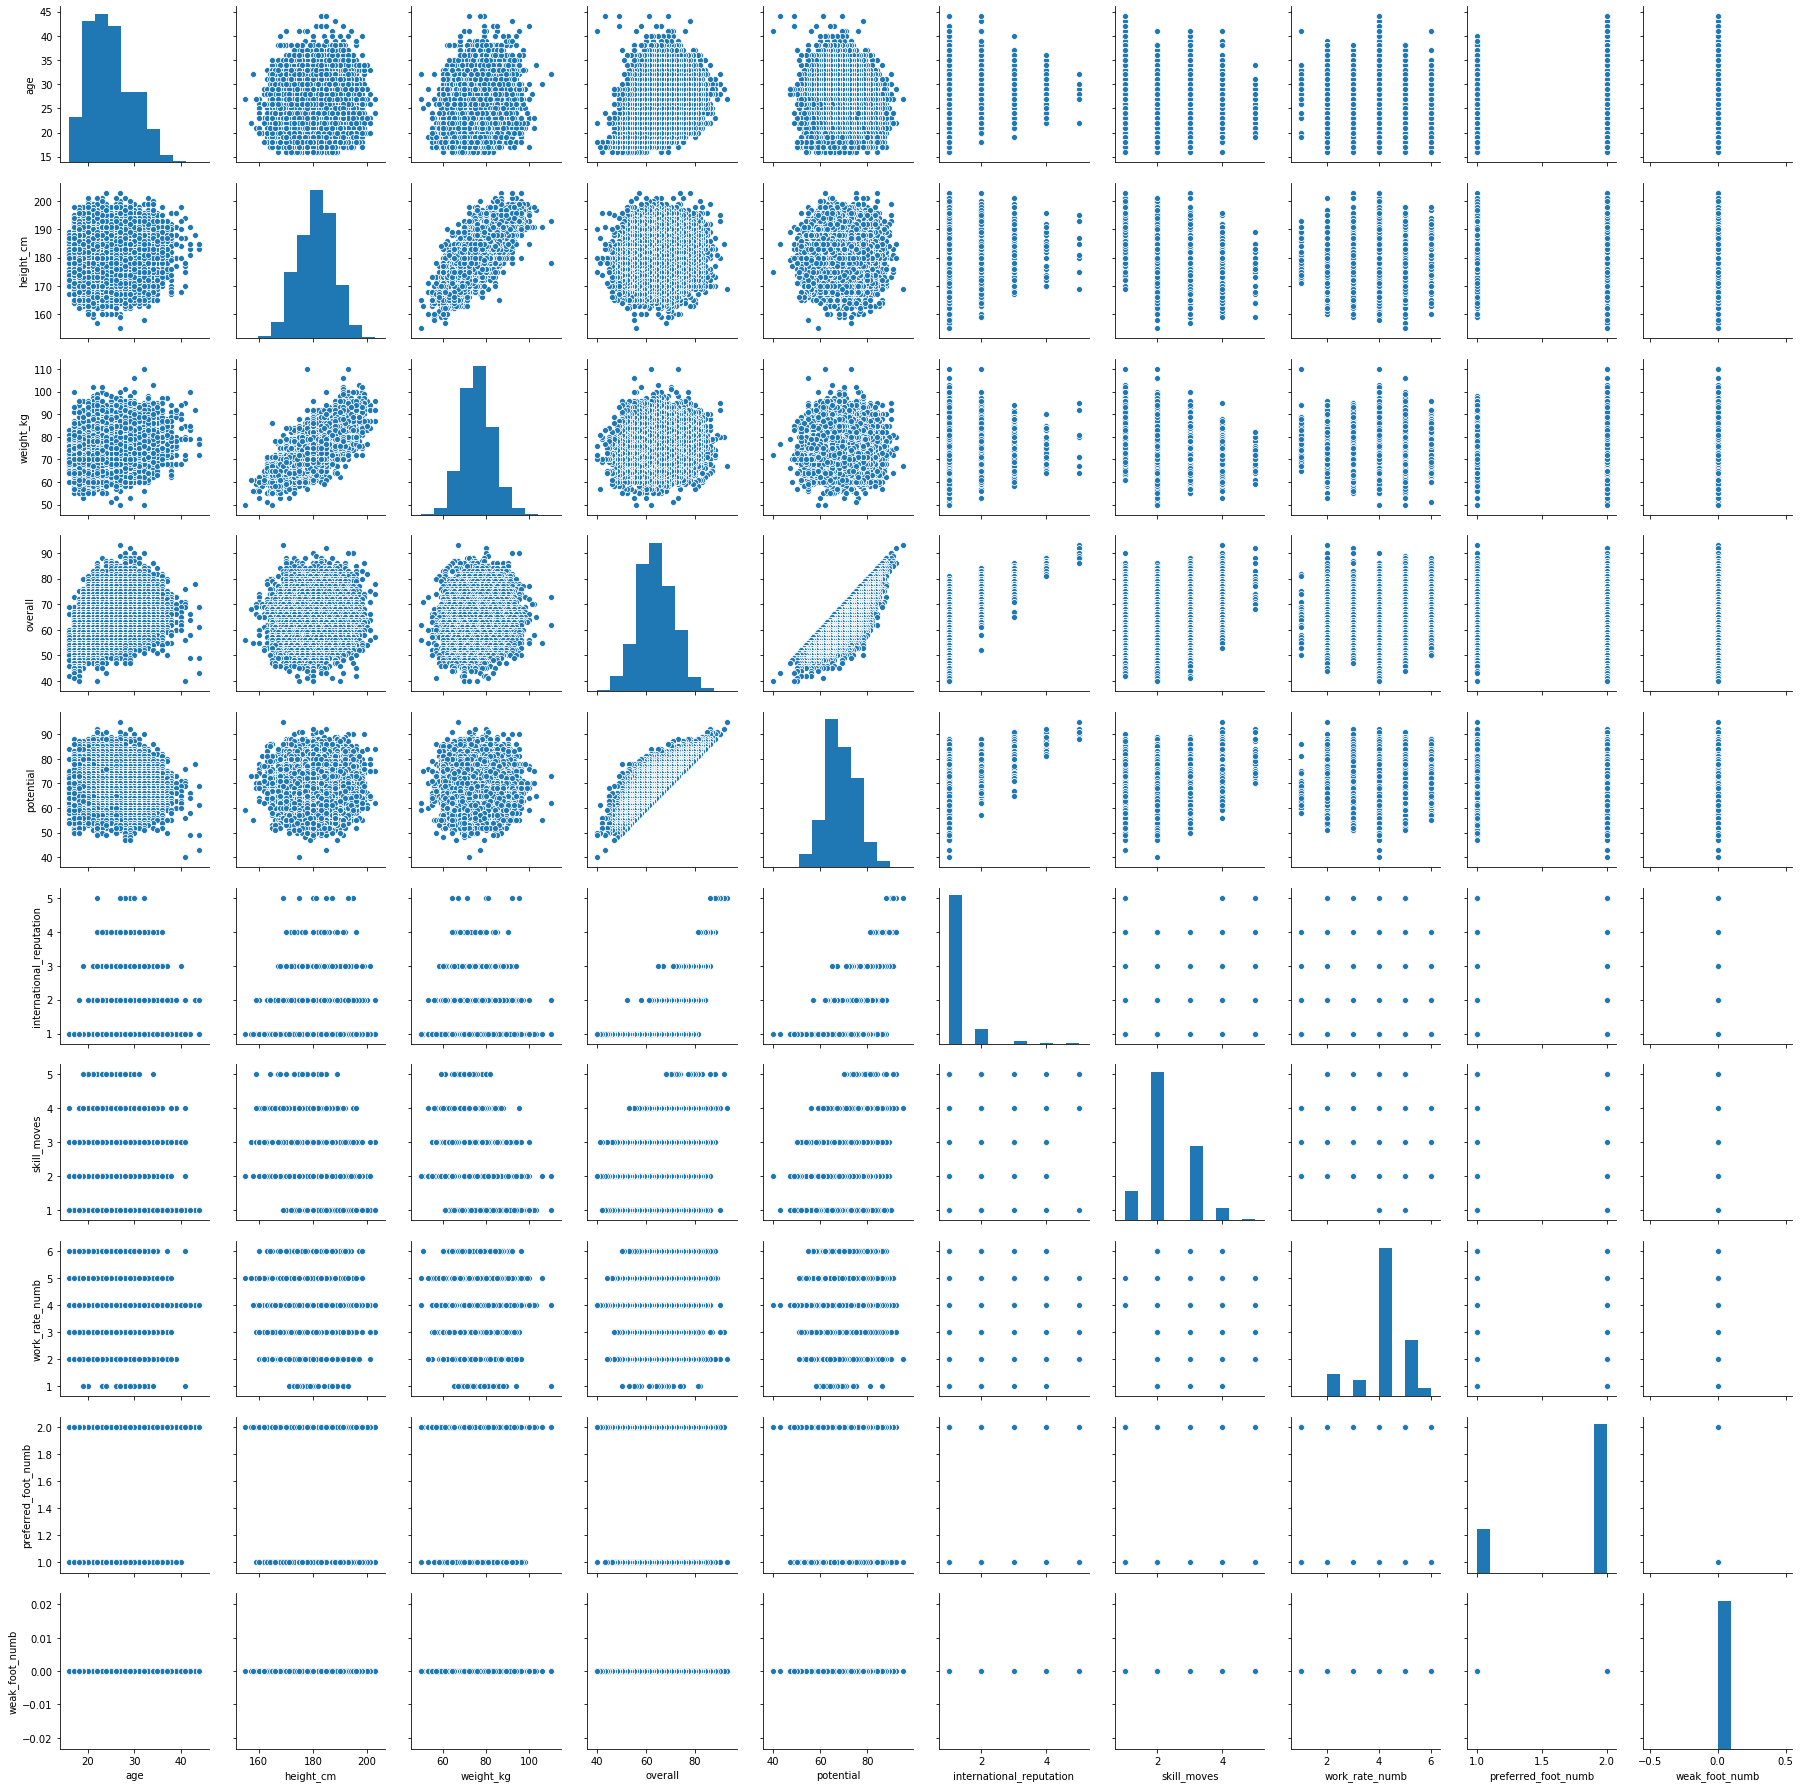

In [14]:
sns.pairplot(pl_15_2)

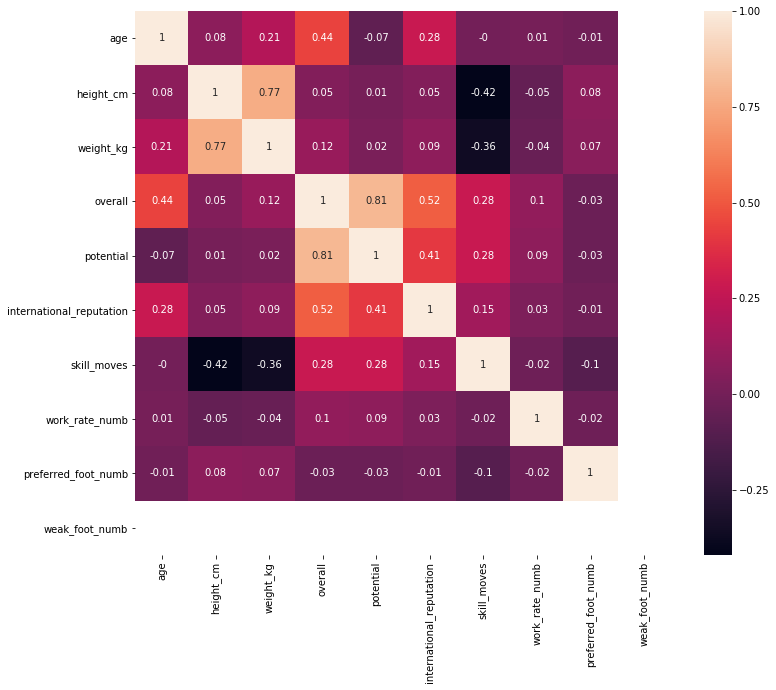

In [15]:
correlation_matrix = pl_15_2.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

Как видно по матрице корреляций и графикам есть большая зависимость между двумя парами перменных: 'overall' и 'potential', height_sm и weight_kg
При построение модели нужно будет попробовать опустить одну переменную из пары и посмотреть, как изменится качество модели

# 3. Построение модели

Формируем признаки и целевую переменную: будем прогонозировать 'эффективность игрока' ('overall')
по значениям признаков

## 3.1 Построение линейной регрессии используя классическое разделение обучаемой и тестовой выборки - 70/30

In [30]:
pl_15_2.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'international_reputation', 'skill_moves', 'work_rate_numb',
       'preferred_foot_numb', 'weak_foot_numb'],
      dtype='object')

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=30)

X = pl_15_2[['age', 'height_cm', 'weight_kg', 'potential','international_reputation', 'skill_moves', 'work_rate_numb','preferred_foot_numb', 'weak_foot_numb']]
y = pl_15_2['overall']

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение

y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))
print("Коэффициенты регрессии: ",estimator.coef_)
print("Свободный коэффициент: ",estimator.intercept_)

print('Точность предсказания модели: ', estimator.score(X_test, y_test))

R2: 	 0.89614589624409
RMSE: 	 2.3269196017621474
MAE: 	 1.7776358836234316
Коэффициенты регрессии:  [7.42135900e-01 4.60295362e-06 2.78218396e-02 8.75681110e-01
 8.22333468e-01 5.40516408e-01 1.55112111e-01 4.04213041e-02
 0.00000000e+00]
Свободный коэффициент:  -19.339091782763163
Точность предсказания модели:  0.89614589624409


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Формируем признаки и целевую переменную:
X = pl_15_2[['age', 'height_cm', 'weight_kg', 'potential','international_reputation', 'skill_moves', 'work_rate_numb','preferred_foot_numb', 'weak_foot_numb']]
y = pl_15_2['overall']
# Разделим данные на группу обучения и проверки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Приводем данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# X_train.head()

# Построим линейную регрессию
reg = LinearRegression().fit(X_train, y_train)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(pl_15_2[['age', 'height_cm', 'weight_kg', 'potential','international_reputation', 'skill_moves', 'work_rate_numb','preferred_foot_numb', 'weak_foot_numb']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

y_pred = reg.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))

print('Точность предсказания модели: ', reg.score(X_test, y_test))

Weights: [ 3.43427821 -0.03681902  0.22925867  5.79966288  0.33529179  0.38148776
  0.11724095  0.0219558   0.        ]
Bias: 64.01690531177829
Error: 494.68397091437004
R2: 	 0.8953066352822753
Точность предсказания модели:  0.8953066352822752


In [69]:
# уберу параметр 'weak_foot_number' - точность предсказания повысилась очень незначительно
# уберу параметр 'preferred_foot_numb' - точность предсказания (0.894100517043775) снизилась
# уберу параметр 'international_reputation' - точность предсказания увеличилась 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=30)

# Формируем признаки и целевую переменную:
X = pl_15_2[['age', 'height_cm', 'weight_kg', 'potential','international_reputation', 'skill_moves', 'work_rate_numb','preferred_foot_numb']]
y = pl_15_2['overall']
# Разделим данные на группу обучения и проверки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Приводем данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# X_train.head()

# Построим линейную регрессию
reg = LinearRegression().fit(X_train, y_train)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(pl_15_2[['age', 'height_cm', 'weight_kg', 'potential','international_reputation', 'skill_moves', 'work_rate_numb','preferred_foot_numb']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

y_pred = reg.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))

print('Точность предсказания модели: ', reg.score(X_test, y_test))

Weights: [ 3.44756714 -0.04281539  0.20411253  5.79058522  0.32940487  0.38771156
  0.13756733 -0.0093552 ]
Bias: 63.91103926096998
Error: 491.3357248085804
R2: 	 0.9003763480932683
Точность предсказания модели:  0.9003763480932683


In [67]:
# линейная регрессия без 'potential'
# Формируем признаки и целевую переменную:
X = pl_15_2[['age', 'height_cm', 'weight_kg','international_reputation', 'skill_moves', 'work_rate_numb','preferred_foot_numb']]
y = pl_15_2['overall']
# Разделим данные на группу обучения и проверки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Приводем данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# X_train.head()

# Построим линейную регрессию
reg = LinearRegression().fit(X_train, y_train)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(pl_15_2[['age', 'height_cm', 'weight_kg','international_reputation', 'skill_moves', 'work_rate_numb','preferred_foot_numb']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

y_pred = reg.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))

print('Точность предсказания модели: ', reg.score(X_test, y_test))

Weights: [ 2.2342288   0.42413906  0.62084344  2.78357192  1.95538437  0.7139245
 -0.11988734]
Bias: 64.02087759815242
Error: 189.31366427177167
R2: 	 0.418170981964167
Точность предсказания модели:  0.418170981964167


In [70]:
# линейная регрессия без 'international_reputation'
# Формируем признаки и целевую переменную:
X = pl_15_2[['age', 'height_cm', 'weight_kg', 'skill_moves', 'work_rate_numb','preferred_foot_numb']]
y = pl_15_2['overall']
# Разделим данные на группу обучения и проверки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Приводем данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
# X_train.head()

# Построим линейную регрессию
reg = LinearRegression().fit(X_train, y_train)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(pl_15_2[['age', 'height_cm', 'weight_kg', 'skill_moves', 'work_rate_numb','preferred_foot_numb']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

y_pred = reg.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))

print('Точность предсказания модели: ', reg.score(X_test, y_test))

Weights: [ 2.87169559  0.72135588  0.72724167  2.54745807  0.83114702 -0.05192574]
Bias: 63.99270207852194
Error: 265.727924579262
R2: 	 0.3032779755616253
Точность предсказания модели:  0.3032779755616253


## 3.2 Построение логистической регрессии используя классическое разделение обучаемой и тестовой выборки - 70/30

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)
X = pl_15_2[['age', 'height_cm', 'weight_kg', 'potential','international_reputation', 'skill_moves', 'work_rate_numb','preferred_foot_numb']]
y = pl_15_2['overall']

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_
print('slope:', model.coef_)

/Users/tanyamak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tanyamak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Точность предсказания модели:  0.10344827586206896
slope: [[-1.75857511e-01  3.01210864e-01 -9.04427022e-02 -9.87180323e-01
   2.95729552e-02  6.69370877e-01  1.98104725e-01 -1.66410574e-01]
 [-1.09515740e+00  2.12547603e-01 -1.40978087e-01 -2.85385283e-01
  -1.11167577e-02  6.35294350e-01  2.44711982e-02  2.53582277e-01]
 [-7.51689294e-01  1.57296789e-01  2.00049515e-02 -4.26214870e-01
   6.37394460e-02  1.87637504e-01  2.56418098e-01  6.09010326e-01]
 [-2.44579420e-01  1.73051768e-01 -6.44562951e-03 -5.67098833e-01
  -3.40202469e-03 -2.27389778e-01  7.68668841e-02 -4.74643912e-01]
 [-6.50639861e-01  1.89631076e-01 -1.27565233e-01 -3.25784318e-01
   5.88242984e-02  6.27206200e-01 -2.62335245e-01 -1.13508941e-01]
 [-5.95931315e-01  1.10738103e-01 -4.93246525e-02 -1.85154653e-01
   1.21048871e-01 -1.92570637e-01 -2.33644479e-01  8.77965947e-01]
 [-5.78201841e-01  1.36224388e-01 -7.56917989e-02 -3.20630335e-01
   4.14740020e-01  2.48761936e-01  1.15743713e+00  1.31059919e-01]
 [-2.928955

## 3.3 Построение модели используя инструмент "Случайный лес"

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=714, n_features=8,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X, y)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X, y))

Значимость признаков:  [0.2134867  0.40453794 0.07856409 0.06716542 0.05924088 0.04939725
 0.08051252 0.04709521]
Точность модели: 0.8935574229691877


## 3.4 Построение модели SVR - Epsilon-Support Vector Regression

In [65]:
#SVR - Epsilon-Support Vector Regression
from sklearn import svm

clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
y_pred = reg.predict(X_test)
print('Точность предсказания модели: ', confidence)
print("R2: \t", r2_score(y_test, y_pred))

Точность предсказания модели:  0.8959972680213262
R2: 	 -4650.458745421762


## Сравнивая показатели точности моделей остановлю выбор на линейной регрессии